#1 Параметры SVM и предварительная нормализация данных.

## 1.0 Установка и импорт необходимых библиотек

In [1]:
!pip install mglearn
!pip install joblib==1.1.0
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.12.4 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
scikit-learn 1.5.2 requires joblib>=1.2.0, but you have joblib 1.1.0 which is incompatible.


In [2]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


mglearn — это библиотека, включающая различные полезные функции. Если вы видите вызов mglearn в коде программы, обычно это быстрый способ построить красивую картинку или загрузить интересные данные.

## 1.1 Linear SVM

loadmat() — загрузить файл MATLAB.

mglearn.discrete_scatter() — это функция из библиотеки mglearn, которая используется для визуализации данных на двумерной плоскости. Она принимает на вход координаты точек и метки классов, а затем отображает точки разными цветами в зависимости от их классов.

.raven — возвращает непрерывный сглаженный массив.

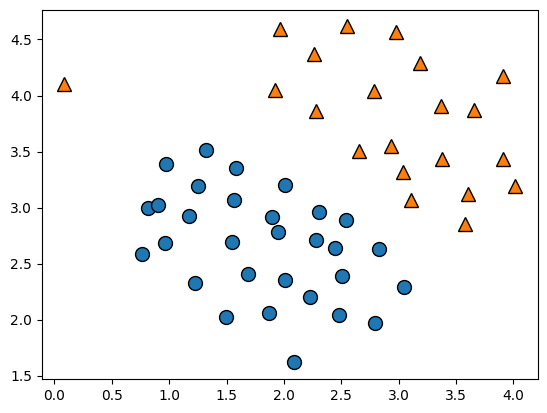

In [5]:
data = loadmat('/content/drive/MyDrive/ML/Lab4/ex4data1.mat')
X = data["X"]
y = data["y"].ravel()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

1. LinearSVC(C, потери, max_iter)
LinearSVC — это класс из библиотеки scikit-learn, который реализует метод опорных векторов (SVM) с линейным ядром.

* C: Это гиперпараметр, который контролирует баланс между максимизацией зазора между классами и минимизацией ошибок на обучающей выборке. Большое значение C приводит к переобучению, а малое — к недообучению.

* потери: Этот параметр определяет функцию потерь, которая используется для обучения модели. Обычно используются 'hinge' (стандартная функция потерь для SVM) или 'squared_hinge' (квадратичная функция потерь).

* max_iter: Это максимальное количество итераций, которое алгоритм будет использовать для оптимизации. Если алгоритм не сходится за это количество итераций, он остановится.

2. mglearn.plots.plot_2d_separator(Y, X, eps)
mglearn.plots.plot_2d_separator — это функция из библиотеки mglearn, которая используется для визуализации границы решений в двумерном пространстве.

* Y: Это обученная модель, которую вы хотите визуализировать. Например, это может быть объект LinearSVC.

* X: Это матрица признаков, которая используется для построения графика. Обычно это двумерный массив, где каждая строка представляет собой точку данных, а каждый столбец — признак.

* eps: Это параметр, который определяет ширину линии, используемой для рисования границы решений.

0.9803921568627451


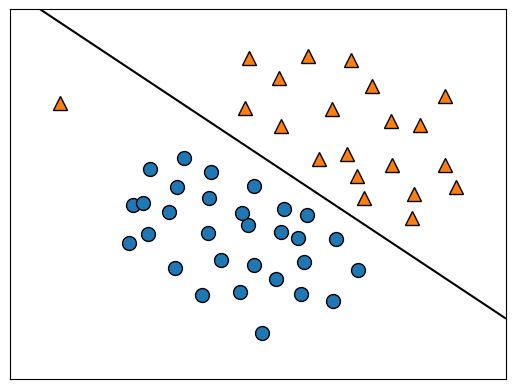

In [7]:
svclassifier = svm.LinearSVC(C=1, loss='hinge', max_iter=10000)
#Teach classifier
svclassifier.fit(X,y)
print(svclassifier.score(X,y))
# Draw a line separating the two classes
# Draw the initial dataset
mglearn.plots.plot_2d_separator(svclassifier, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

1.0


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


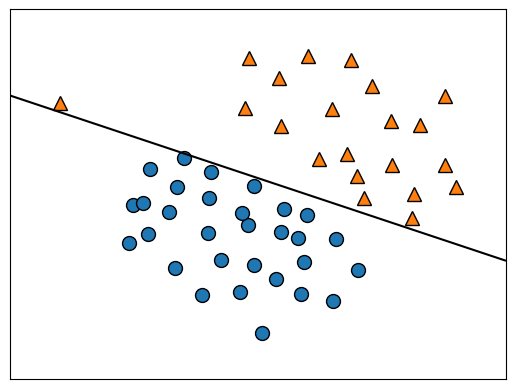

In [8]:
svclassifier = svm.LinearSVC(C=2000, loss='hinge', max_iter=10000)
#Teach classifier
svclassifier.fit(X,y)
print(svclassifier.score(X,y))
# Draw a line separating the two classes
# Draw the initial dataset
mglearn.plots.plot_2d_separator(svclassifier, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

## 1.2 Нелинейный SVM для линейно неразделимых классов

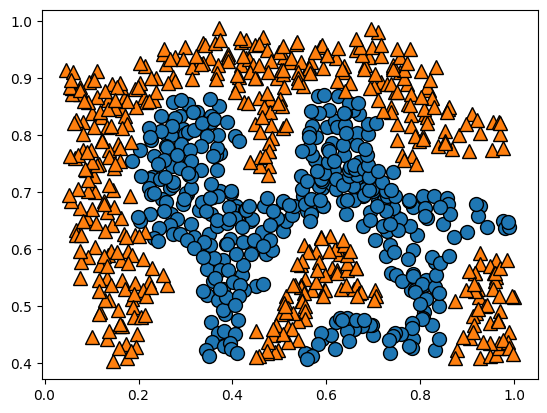

In [9]:
data = loadmat('/content/drive/MyDrive/ML/Lab4/ex4data2.mat')
X = data["X"]
y = data["y"].ravel()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

1. kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} или callable, по умолчанию=’rbf’

Описание: Определяет тип ядра, которое будет использоваться в алгоритме. Если тип ядра не указан, будет использоваться ‘rbf’ (радиальная базисная функция).

Возможные значения:

* ‘linear’: Линейное ядро. Подходит для линейно разделимых данных.
* ‘poly’: Полиномиальное ядро. Позволяет моделировать нелинейные границы решений.
* ‘rbf’: Радиальная базисная функция (RBF). Одно из наиболее популярных ядер для SVM.
* ‘sigmoid’: Сигмоидальное ядро. Редко используется в SVM.
* ‘precomputed’: Предварительно вычисленное ядро. Используется, когда ядро уже вычислено заранее.
* callable: Пользовательское ядро, которое можно определить самостоятельно.

2. C - float, по умолчанию=1.0

Описание: Параметр регуляризации. Сила регуляризации обратно пропорциональна значению C. Чем больше C, тем меньше регуляризация, и модель будет пытаться минимизировать ошибки на обучающих данных, что может привести к переобучению. Чем меньше C, тем больше регуляризация, и модель будет более консервативной, что может привести к недообучению.

3. gamma {‘scale’, ‘auto’} или float, по умолчанию=’scale’

Описание: Коэффициент ядра для ‘rbf’, ‘poly’ и ‘sigmoid’. Определяет, насколько быстро уменьшается влияние точек данных на расстоянии от разделяющей гиперплоскости.

Возможные значения:
* ‘scale’: Используется значение 1 / (n_features * X.var()) в качестве gamma.
* ‘auto’: Используется значение 1 / n_features.
* float: Пользовательское значение gamma.

0.9698725376593279


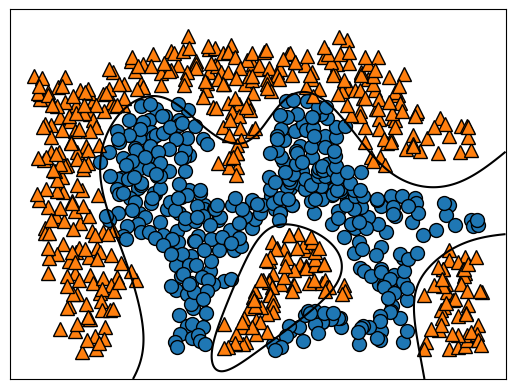

In [10]:
svmclassifier = svm.SVC(kernel='rbf', C=100, gamma=10)
svmclassifier.fit(X,y)
print(svmclassifier.score(X, y))
# Draw a curve separating the two classes
mglearn.plots.plot_2d_separator(svmclassifier, X, eps=.05)
# Draw the initial dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

Мы можем использовать параметры C и Gamma для обеспечения точности метода.

## 1.3 Выбор параметров SVM для решения задачи нелинейной разделимости

In [11]:
data = loadmat('/content/drive/MyDrive/ML/Lab4/ex4data3.mat')
# train
X = data["X"]
y = data["y"].ravel()
# test
Xval = data["Xval"]
yval = data["yval"].ravel()

Наиболее часто используемый метод — это поиск по сетке, который по сути представляет собой попытку просмотреть все возможные комбинации параметров. Ядро — RBF (Radial Basic Function Kernel).

In [12]:
# Grid sample
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

In [13]:
# find the best values of C and Y
def gridSearch(best_c,best_gamma,best_score):
  for c_value in C_values:
    for gamma in gamma_values:
        svmclassifier = svm.SVC(kernel='rbf', C = c_value, gamma=gamma)
        svmclassifier.fit(X, y)
        score = svmclassifier.score(Xval, yval)
        if score > best_score:
          best_c = c_value
          best_gamma = gamma
          best_score = score
  best = [best_c,best_gamma,best_score]
  return best

In [14]:
best = gridSearch(C_values[0],gamma_values[0],0)
print(f'Best score = {best[0]},\nGamma = {best[1]},\nC = {best[2]}')

Best score = 0.3,
Gamma = 100,
C = 0.965


In [15]:
def plot_mg(svmclassifier, X, y):
    mglearn.plots.plot_2d_separator(svmclassifier, X, eps=.05)
    # Draw the initial dataset
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

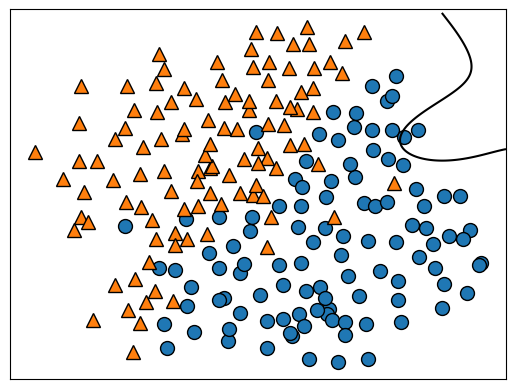

In [16]:
plot_mg(svmclassifier, X, y)

### 1.3.1 Gamma = var, C - const = 10

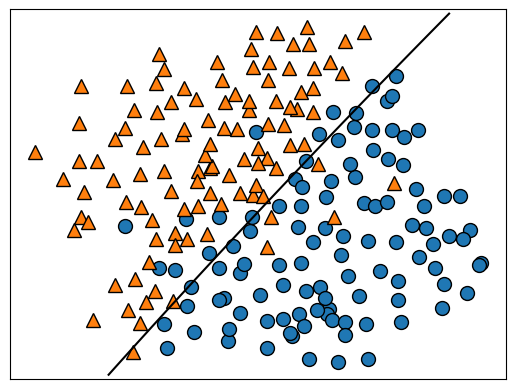

In [19]:
plot_mg(svm.SVC(kernel='rbf', C = 10, gamma=0.1).fit(X, y), X, y)

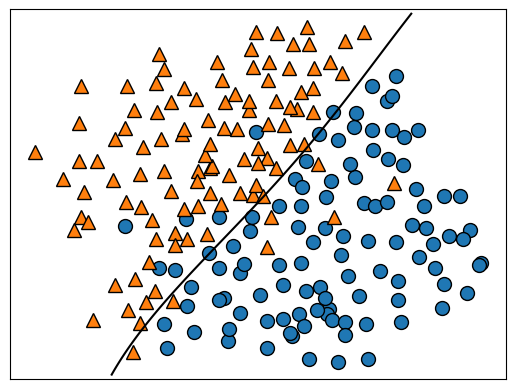

In [20]:
plot_mg(svm.SVC(kernel='rbf', C = 10, gamma=1).fit(X, y), X, y)

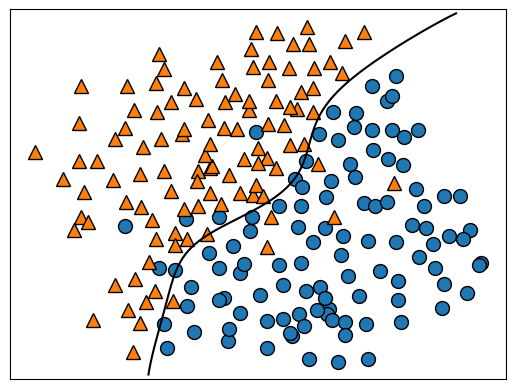

In [21]:
plot_mg(svm.SVC(kernel='rbf', C = 10, gamma=10).fit(X, y), X, y)

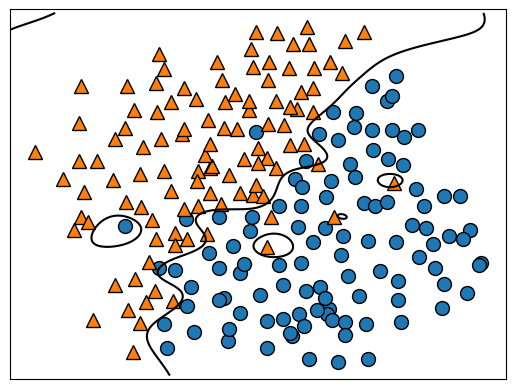

In [22]:
plot_mg(svm.SVC(kernel='rbf', C = 10, gamma=100).fit(X, y), X, y)

Чем больше C, тем ровнее граница

### 1.3.2 Gamma = const = 100, C = var

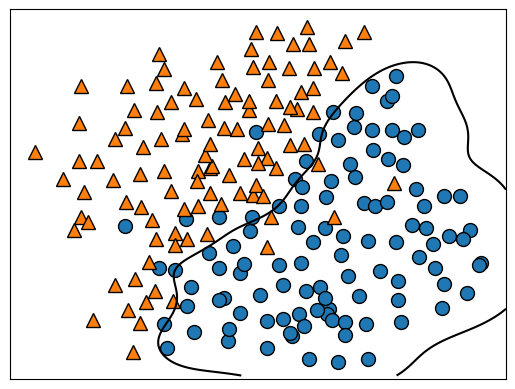

In [23]:
plot_mg(svm.SVC(kernel='rbf', C = 0.1, gamma=100).fit(X, y), X, y)

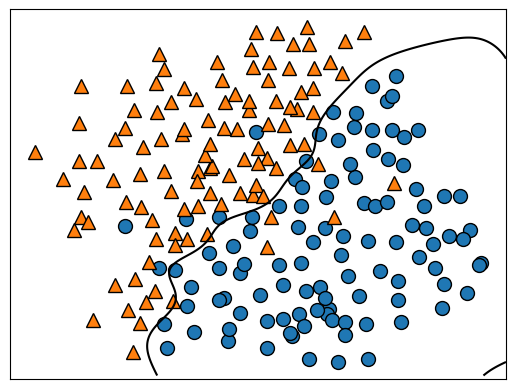

In [24]:
plot_mg(svm.SVC(kernel='rbf', C = 0.5, gamma=100).fit(X, y), X, y)

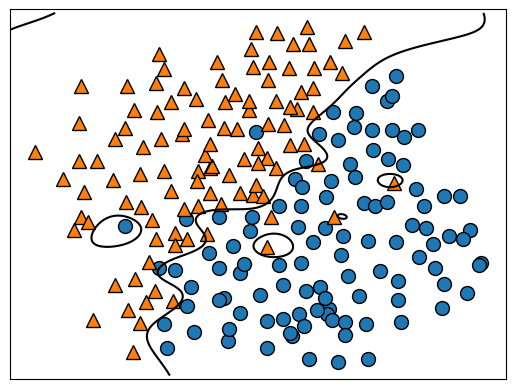

In [25]:
plot_mg(svm.SVC(kernel='rbf', C = 10, gamma=100).fit(X, y), X, y)

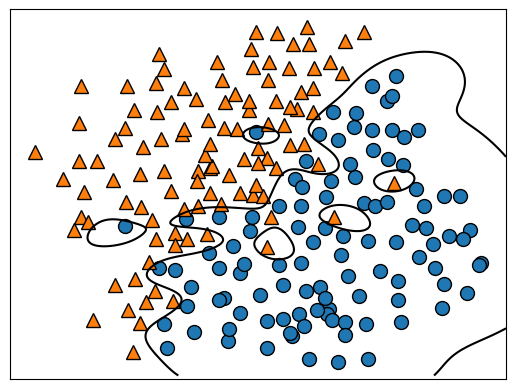

In [26]:
plot_mg(svm.SVC(kernel='rbf', C = 50, gamma=100).fit(X, y), X, y)

Чем больше гаммы, тем больше областей

## 1.4 Влияние предварительной нормализации данных на производительность SVM

Давайте загрузим готовый к использованию набор данных рака молочной железы, который содержит 569 данных о злокачественных и доброкачественных опухолях. Каждая точка набора характеризуется 30 признаками.

In [27]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

Использовать метод SVM

In [28]:
svc = svm.SVC()
svc.fit(X_train, y_train)
print(f'train accuracy {svc.score(X_train, y_train)}')
print(f'test accuracy {svc.score(X_test, y_test)}')

train accuracy 0.92018779342723
test accuracy 0.916083916083916


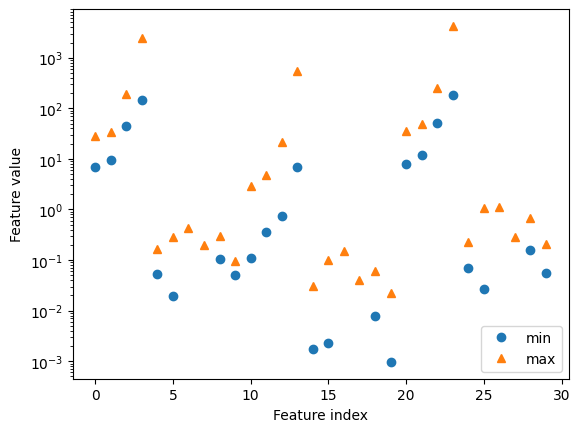

In [29]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature value")
plt.yscale("log")

Точность на тестовом наборе серьезно ниже. Во многом это связано с тем, что атрибуты объектов сильно различаются по величине.

### 1.4.1 Нормализация и повторение


In [30]:
scaler = MinMaxScaler()
scaler.fit(cancer.data)
X_copy = scaler.transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(X_copy, cancer.target)

In [31]:
svc = svm.SVC()
svc.fit(X_train, y_train)
print(f'train accuracy {svc.score(X_train, y_train)}')
print(f'test accuracy {svc.score(X_test, y_test)}')

train accuracy 0.9835680751173709
test accuracy 0.965034965034965


Результат лучше

Увеличьте результат

In [32]:
svc = svm.SVC(C=10)
svc.fit(X_train, y_train)
print(f'train accuracy {svc.score(X_train, y_train)}')
print(f'test accuracy {svc.score(X_test, y_test)}')

train accuracy 0.9906103286384976
test accuracy 0.9790209790209791


# 2 Решение проблемы классификации спама/отсутствия спама

Регулярное выражение (или RE) определяет набор соответствующих ему строк.

Стемминг — это процесс поиска основы слова для заданного исходного слова. Основа слова не обязательно совпадает с морфологическим корнем слова.

In [33]:
import re
from nltk.stem import PorterStemmer
import numpy as np
import pandas as pd

In [34]:
ps = PorterStemmer()

sub(шаблон, что заменить, какую строку искать)

r — обойти специальные символы

token - список индексных слов в словаре


In [35]:
def processEmail(text, ps, list_dictionary):
  text = text.lower()
  text = re.sub(r'\n', ' ', text)
  print(f'no new string symbol: {text}')
  clean = re.compile('<.*?>')
  text = re.sub(clean, '', text)
  print(f'no html: {text}')
  text = re.sub(r'https?://\S+', 'httpaddr', text)
  print(f'no url: {text}')
  text = re.sub(r'[\w.+-]+@[\w-]+\.[\w.-]+', 'emailaddr', text)
  print(f'no email: {text}')
  text = text.translate({ord(i): 'number' for i in '1234567890'})
  print(f'no numbers: {text}')
  text = re.sub(r'[$]', 'dollar', text)
  print(f'no dollar: {text}')
  text = re.sub(r'[^\w\s]','', text)
  print(f'no symbols: {text}')
  text = re.sub(r"[']", '', text)
  print(text)
  # delete spaces
  text = re.sub(r'\s+', ' ', text)
  # to dictionary func
  stemmed_text = [ps.stem(word) for word in text.split(' ')]
  print(stemmed_text)
  # create token - number of the word in dictionary
  word_token = [list_dictionary.index(word)+1 for word in stemmed_text if word in list_dictionary]
  return word_token

Вектор символов, 0 — если слово не встречается в предложении, 1 — если встречается, результат — вектор 0 или 1.


In [36]:
def getFeatures(vocabList,size):
    return np.array([1 if item in vocabList else 0 for item in range(size)]).reshape(1,-1)

Функция изменения размера

In [39]:
def transform(data:pd.DataFrame):
    data=np.resize(data,(1,len(data)))
    return list(data[0])

***Прочтите словарь самых популярных слов из vocab.txt***

In [40]:
data = pd.read_table(r'/content/drive/MyDrive/ML/Lab4/vocab.txt',header=None,sep=r"\s+")
data.columns=['index','word']
indexs = transform(data[data.columns[:-1]])
words = transform(data[data.columns[-1:]])
size=len(indexs)
print(f'size={size}')

size=1899


***Прочитайте значения слов***

In [41]:
dictionary = open('/content/drive/MyDrive/ML/Lab4/vocab.txt', 'r')
list_dictionary = []
for line in dictionary.readlines():
  line = line.replace('\t',' ').split(' ')
  list_dictionary.append(line[1].replace('\n', ''))
print(list_dictionary)

['aa', 'ab', 'abil', 'abl', 'about', 'abov', 'absolut', 'abus', 'ac', 'accept', 'access', 'accord', 'account', 'achiev', 'acquir', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'adam', 'add', 'addit', 'address', 'administr', 'adult', 'advanc', 'advantag', 'advertis', 'advic', 'advis', 'ae', 'af', 'affect', 'affili', 'afford', 'africa', 'after', 'ag', 'again', 'against', 'agenc', 'agent', 'ago', 'agre', 'agreement', 'aid', 'air', 'al', 'alb', 'align', 'all', 'allow', 'almost', 'alon', 'along', 'alreadi', 'alsa', 'also', 'altern', 'although', 'alwai', 'am', 'amaz', 'america', 'american', 'among', 'amount', 'amp', 'an', 'analysi', 'analyst', 'and', 'ani', 'anim', 'announc', 'annual', 'annuiti', 'anoth', 'answer', 'anti', 'anumb', 'anybodi', 'anymor', 'anyon', 'anyth', 'anywai', 'anywher', 'aol', 'ap', 'apolog', 'app', 'appar', 'appear', 'appl', 'appli', 'applic', 'appreci', 'approach', 'approv', 'apt', 'ar', 'archiv', 'area', 'aren', 'argument', 'arial', 'arm', 'around', 'arrai', 'a

In [42]:
processEmail("""> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many
visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of
$100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre
running something big..\n\nTo unsubscribe yourself from this mailing list, send an email
to:\ngroupname-unsubscribe@egroups.com""", ps, list_dictionary)

no new string symbol: > anyone knows how much it costs to host a web portal ? > well, it depends on how many visitors you're expecting. this can be anywhere from less than 10 bucks a month to a couple of $100.  you should checkout http://www.rackspace.com/ or perhaps amazon ec2  if youre running something big..  to unsubscribe yourself from this mailing list, send an email to: groupname-unsubscribe@egroups.com
no html: > anyone knows how much it costs to host a web portal ? > well, it depends on how many visitors you're expecting. this can be anywhere from less than 10 bucks a month to a couple of $100.  you should checkout http://www.rackspace.com/ or perhaps amazon ec2  if youre running something big..  to unsubscribe yourself from this mailing list, send an email to: groupname-unsubscribe@egroups.com
no url: > anyone knows how much it costs to host a web portal ? > well, it depends on how many visitors you're expecting. this can be anywhere from less than 10 bucks a month to a coupl

[86,
 916,
 794,
 1077,
 883,
 370,
 1699,
 790,
 1822,
 1831,
 883,
 431,
 1171,
 794,
 1002,
 1895,
 592,
 1676,
 238,
 162,
 89,
 688,
 945,
 1663,
 1062,
 1699,
 375,
 1162,
 1893,
 1510,
 799,
 1182,
 1237,
 810,
 1895,
 1440,
 1547,
 181,
 1699,
 1758,
 1896,
 688,
 1676,
 992,
 961,
 1477,
 71,
 530,
 1699,
 531]

In [43]:
spamTrain = loadmat('/content/drive/MyDrive/ML/Lab4/spamTrain.mat')
spamX_train = spamTrain["X"]
spamY_train = spamTrain['y']

In [44]:
spamTest = loadmat('/content/drive/MyDrive/ML/Lab4/spamTest.mat')
spamX_test = spamTest["Xtest"]
spamY_test = spamTest["ytest"]

In [45]:
spamX_train[0].shape

(1899,)

In [46]:
svm_spam = svm.SVC(kernel='rbf')
svm_spam.fit(spamX_train, spamY_train)
print(svm_spam.score(spamX_train, spamY_train))
print(svm_spam.score(spamX_test, spamY_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.99325
0.987


In [47]:
with open('/content/drive/MyDrive/ML/Lab4/spamSample1.txt', 'r') as f:
  text = f.read()
  print(text)
  print(svm_spam.predict(getFeatures(processEmail(text, ps, list_dictionary), size)))

Do You Want To Make $1000 Or More Per Week?

 

If you are a motivated and qualified individual - I 
will personally demonstrate to you a system that will 
make you $1,000 per week or more! This is NOT mlm.

 

Call our 24 hour pre-recorded number to get the 
details.  

 

000-456-789

 

I need people who want to make serious money.  Make 
the call and get the facts. 

Invest 2 minutes in yourself now!

 

000-456-789

 

Looking forward to your call and I will introduce you 
to people like yourself who
are currently making $10,000 plus per week!

 

000-456-789



3484lJGv6-241lEaN9080lRmS6-271WxHo7524qiyT5-438rjUv5615hQcf0-662eiDB9057dMtVl72

no new string symbol: do you want to make $1000 or more per week?     if you are a motivated and qualified individual - i  will personally demonstrate to you a system that will  make you $1,000 per week or more! this is not mlm.     call our 24 hour pre-recorded number to get the  details.       000-456-789     i need people who want to make s

In [48]:
with open('/content/drive/MyDrive/ML/Lab4/spamSample2.txt', 'r') as f:
  text = f.read()
  print(text)
  processed_text = processEmail(text,ps, list_dictionary)
  print(svm_spam.predict(getFeatures(processed_text, size)))

Best Buy Viagra Generic Online

Viagra 100mg x 60 Pills $125, Free Pills & Reorder Discount, Top Selling 100% Quality & Satisfaction guaranteed!

We accept VISA, Master & E-Check Payments, 90000+ Satisfied Customers!
http://medphysitcstech.ru
no new string symbol: best buy viagra generic online  viagra 100mg x 60 pills $125, free pills & reorder discount, top selling 100% quality & satisfaction guaranteed!  we accept visa, master & e-check payments, 90000+ satisfied customers! http://medphysitcstech.ru
no html: best buy viagra generic online  viagra 100mg x 60 pills $125, free pills & reorder discount, top selling 100% quality & satisfaction guaranteed!  we accept visa, master & e-check payments, 90000+ satisfied customers! http://medphysitcstech.ru
no url: best buy viagra generic online  viagra 100mg x 60 pills $125, free pills & reorder discount, top selling 100% quality & satisfaction guaranteed!  we accept visa, master & e-check payments, 90000+ satisfied customers! httpaddr
no ema

In [49]:
with open('/content/drive/MyDrive/ML/Lab4/emailSample1.txt', 'r') as f:
  text = f.read()
  print(text)
  processed_text = processEmail(text,ps, list_dictionary)
  print(svm_spam.predict(getFeatures(processed_text, size)))

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com
no new string symbol: > anyone knows how much it costs to host a web portal ? > well, it depends on how many visitors you're expecting. this can be anywhere from less than 10 bucks a month to a couple of $100.  you should checkout http://www.rackspace.com/ or perhaps amazon ec2  if youre running something big..  to unsubscribe yourself from this mailing list, send an email to: groupname-unsubscribe@egroups.com
no html: > anyone knows how much it costs to host a web portal ? > well, it depends on how many visitors you're expecting. this can be anywhere from less than 10 bucks a month to a couple of $10

In [50]:
with open('/content/drive/MyDrive/ML/Lab4/emailSample2.txt', 'r') as f:
  text = f.read()
  print(text)
  processed_text = processEmail(text,ps, list_dictionary)
  print(svm_spam.predict(getFeatures(processed_text, size)))

Folks,
 
my first time posting - have a bit of Unix experience, but am new to Linux.

 
Just got a new PC at home - Dell box with Windows XP. Added a second hard disk
for Linux. Partitioned the disk and have installed Suse 7.2 from CD, which went
fine except it didn't pick up my monitor.
 
I have a Dell branded E151FPp 15" LCD flat panel monitor and a nVidia GeForce4
Ti4200 video card, both of which are probably too new to feature in Suse's default
set. I downloaded a driver from the nVidia website and installed it using RPM.
Then I ran Sax2 (as was recommended in some postings I found on the net), but
it still doesn't feature my video card in the available list. What next?
 
Another problem. I have a Dell branded keyboard and if I hit Caps-Lock twice,
the whole machine crashes (in Linux, not Windows) - even the on/off switch is
inactive, leaving me to reach for the power cable instead.
 
If anyone can help me in any way with these probs., I'd be really grateful -
I've searched the 'ne

Мы не знаем, как данные были предварительно обработаны, какой тип обработки использовался, как данные были размечены